<a href="https://colab.research.google.com/github/raghunandepu/Tensorflow2.0_practice/blob/master/1_Develop_A_Single_Neuron_Model_to_Convert_C_to_F_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT


- In this project, we will build a simple machine learning model to convert from celsius to fahrenheit. 
- The equation is as follows: **T(°F) = T(°C) × 9/5 + 32**
- For Example, let's convert 0°C celsius temperature to Fahrenheit:  **(0°C × 9/5) + 32 = 32°F**



<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/7/70/Thermometer_CF.svg"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Convert Celsius to Fahrenheit [Image Source: https://commons.wikimedia.org/wiki/File:Thermometer_CF.svg]
  </td></tr>
</table>


# STEP #0: IMPORT LIBRARIES

In [10]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# STEP #1: IMPORT DATASETS

In [12]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# You have to include the full link to the csv file containing your dataset
Temperature_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Celsius-to-Fahrenheit.csv")
Temperature_df.reset_index(drop=True, inplace=True)



In [14]:
Temperature_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [15]:
Temperature_df.tail(3)

,Celsius,Fahrenheit
27,40,104.0
28,50,122.0
29,60,140.0


In [16]:
Temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Celsius       30 non-null int64
Fahrenheit    30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [17]:
Temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# STEP #2: VISUALIZE DATASET

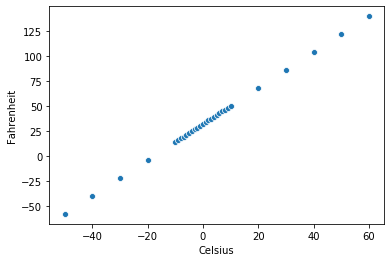

In [21]:
sns.scatterplot(Temperature_df['Celsius'], Temperature_df['Fahrenheit'])

# STEP #3: CREATE TESTING AND TRAINING DATASET

In [0]:
X_train = Temperature_df['Celsius']
y_train = Temperature_df['Fahrenheit']


# STEP#4: BUILD AND TRAIN THE MODEL

In [23]:
X_train.shape

(30,)

In [24]:
y_train.shape

(30,)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape=[1]))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5),loss='mean_squared_error')

In [35]:
epochs_hist = model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
30/30 [==============================] - 0s 3ms/sample - loss: 6.3665e-13
Epoch 2/100
30/30 [==============================] - 0s 115us/sample - loss: 37.2299
Epoch 3/100
30/30 [==============================] - 0s 126us/sample - loss: 5.4122
Epoch 4/100
30/30 [==============================] - 0s 152us/sample - loss: 33.9260
Epoch 5/100
30/30 [==============================] - 0s 158us/sample - loss: 12.9278
Epoch 6/100
30/30 [==============================] - 0s 195us/sample - loss: 0.2640
Epoch 7/100
30/30 [==============================] - 0s 165us/sample - loss: 13.7538
Epoch 8/100
30/30 [==============================] - 0s 148us/sample - loss: 17.9016
Epoch 9/100
30/30 [==============================] - 0s 152us/sample - loss: 6.2725
Epoch 10/100
30/30 [==============================] - 0s 123us/sample - loss: 0.0685
Epoch 11/100
30/30 [==============================] - 0s 185us/sample - loss: 6.4633
Epoch 12/100
30/30 [==============================] - 0s 176us/samp

# STEP#5: EVALUATING THE MODEL 

In [36]:
epochs_hist.history.keys()

dict_keys(['loss'])

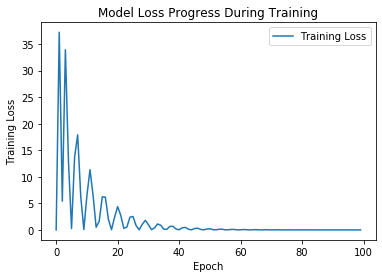

In [37]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [38]:
model.get_weights()

[array([[1.80111]], dtype=float32), array([31.999083], dtype=float32)]

In [41]:
# Use the trained model to perform predictions

Temp_C = 0
Temp_F = model.predict([Temp_C])
print('Temperature in degF Using Trained ANN =', Temp_F)


Temperature in degF Using Trained ANN = [[31.999083]]


In [42]:
# Let's confirm this Using the equation: 
Temp_F = 9/5 * Temp_C + 32
print('Temperature in degF Using Equation =', Temp_F)


Temperature in degF Using Equation = 32.0


# EXCELLENT JOB & CONGRATULATIONS! NOW YOU HAVE BUILT YOUR FIRST NEURAL NETWORK MODEL USING TENSORFLOW 2.0 IN GOOGLE COLAB! 